https://github.com/krishnaik06/Feature-Selection-techniques/blob/master/Feature%20Selection.ipynb

https://www.youtube.com/watch?v=EqLBAmtKMnQ

In [37]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data = pd.read_csv("/content/EEG_HMC_FeatureExtraction_numeric.csv")
X = data.iloc[:,0:76] #independent columns
y = data[['Sleep Stage']]   #target column 

In [38]:
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)

In [39]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [40]:
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns

In [41]:
featureScores

,Specs,Score
0,Sleep Stage,35903.700356
1,MeanP_Alpha_F4,62.731243
2,MedianF_Alpha_F4,625.441584
3,MeanF_Alpha_F4,4186.932107
4,Spect4al Edge_Alpha_F4,4760.597022
...,...,...
71,MeanP_Gamma_O2,26.248133
72,MedianF_Gamma_O2,539.956987
73,MeanF_Gamma_O2,374.193067
74,Spect4al Edge_Gamma_O2,358.426283


In [42]:
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                     Specs         Score
0              Sleep Stage  35903.700356
60           PeakF_Beta_O2  13501.822460
10           PeakF_Beta_F4   8003.136934
35           PeakF_Beta_C4   5144.466182
4   Spect4al Edge_Alpha_F4   4760.597022
3           MeanF_Alpha_F4   4186.932107
9    Spect4al Edge_Beta_F4   3953.173955
75          PeakF_Gamma_O2   3329.282921
7          MedianF_Beta_F4   3081.298755
29  Spect4al Edge_Alpha_C4   2979.921329
28          MeanF_Alpha_C4   2616.797850
34   Spect4al Edge_Beta_C4   2465.970531
55          PeakF_Alpha_O2   2117.882320
20          PeakF_Delta_F4   2117.125596
25          PeakF_Gamma_F4   1978.892156
50          PeakF_Gamma_C4   1912.328528
43          MeanF_Delta_C4   1866.515375
54  Spect4al Edge_Alpha_O2   1784.013962
70          PeakF_Delta_O2   1687.660593
52        MedianF_Alpha_O2   1576.224952


In [43]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


ExtraTreesClassifier()

In [44]:
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[5.03896390e-01 2.59122914e-05 5.80363334e-03 1.44313057e-02
 1.69785366e-02 5.03463253e-03 3.70653662e-06 1.89756533e-02
 9.18555229e-03 1.15259158e-02 7.90113331e-03 1.82117775e-04
 1.26437473e-02 6.69740715e-03 5.89392519e-03 6.97627290e-03
 1.01118377e-03 3.04038073e-03 1.54558386e-02 9.82406721e-03
 4.71018935e-03 1.64746026e-05 6.84801407e-03 5.73163922e-03
 4.69536127e-03 4.38027394e-03 2.08166519e-05 5.39932002e-03
 1.28237004e-02 1.00791365e-02 4.96462056e-03 1.94597246e-04
 1.12322517e-02 8.34315105e-03 8.16119303e-03 4.90240968e-03
 2.29249462e-04 1.43412279e-02 7.03062308e-03 6.94802055e-03
 7.16520109e-03 1.13256086e-03 4.41614794e-03 2.18723387e-02
 1.26644105e-02 3.60742842e-03 2.24387587e-04 5.48172461e-03
 5.06283223e-03 4.21787248e-03 4.44184986e-03 3.42168932e-05
 8.16708053e-03 7.57470249e-03 7.61501611e-03 5.95860094e-03
 4.37944040e-07 6.99250166e-03 6.34084244e-03 6.28502440e-03
 6.19519275e-03 1.75734037e-04 1.64045028e-02 7.95958603e-03
 1.03683400e-02 9.685096

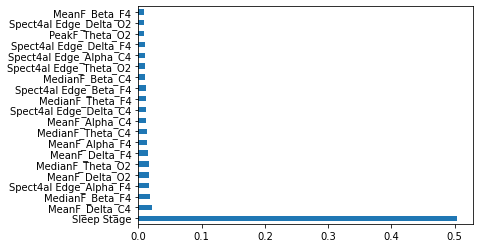

In [47]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [46]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(77,77))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

Output hidden; open in https://colab.research.google.com to view.